In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

# 忽略所有警告
warnings.filterwarnings("ignore")

# 设置中文字体为 SimHei（黑体）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体 SimHei
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

df = pd.read_excel("../已整合数据/马鞍山1号数据整合202308-202412.xlsx")
df

,时间,平均负荷,厂用电率,主汽压力,主汽温度,再热汽温,给水温度,真空度,排汽温度,排烟温度,...,高位热量,低位热量,固定碳%,#1煤量,#1热值,飞灰%#1,炉渣%#1,负荷,碳排放强度,负荷率
0,2023-08-01,NaN,NaN,16.065449,NaN,NaN,237.819920,94.393120,34.423918,120.547890,...,21.19,18.56,36.26,4998,18.46,1.353333,4.87,389.677003,874.946294,59.041970
1,2023-08-02,NaN,NaN,17.535095,NaN,NaN,239.207460,93.980667,35.528028,126.022090,...,21.47,18.72,37.18,4420,18.78,1.176667,4.93,408.276215,860.640267,61.860033
2,2023-08-03,NaN,NaN,17.535095,NaN,NaN,239.207460,93.980667,35.528028,126.022090,...,22.80,19.65,39.67,4424,19.35,1.423333,5.04,405.236979,880.361819,61.399542
3,2023-08-04,463.799990,NaN,17.535095,NaN,NaN,239.207460,93.980667,35.528028,126.022090,...,21.95,19.03,38.36,5578,18.83,1.356667,4.27,553.980625,857.798288,83.936458
4,2023-08-05,463.799990,NaN,17.535095,NaN,NaN,239.207460,93.980667,35.528028,126.022090,...,21.85,18.86,38.47,6628,18.81,1.326667,4.31,616.803194,853.045939,93.455029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,2024-12-27,536.785727,3.51448,23.833649,568.796295,565.480041,265.273621,96.556121,30.391722,114.439377,...,22.48,18.93,36.91,5306,19.24,1.486667,4.91,513.771944,794.480431,77.844234
515,2024-12-28,388.962175,3.51448,18.112924,560.746643,547.274780,246.852801,97.132126,26.792375,102.516357,...,21.95,18.29,35.78,3825,18.69,1.476667,5.02,377.354861,795.348729,57.174979
516,2024-12-29,435.360017,3.51448,18.704281,561.251831,556.695557,252.086365,96.711757,28.329635,97.923981,...,22.19,18.18,35.75,3668,18.41,1.356667,4.98,360.441215,896.680537,54.612305
517,2024-12-30,363.211545,3.51448,16.992607,558.918640,545.457459,243.366595,96.686992,27.013812,101.438002,...,21.59,18.26,35.48,3777,17.91,1.526667,5.29,351.485417,897.858448,53.255366


In [2]:
# 查看数据的基本信息
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   时间        519 non-null    datetime64[ns]
 1   平均负荷      516 non-null    float64       
 2   厂用电率      504 non-null    float64       
 3   主汽压力      519 non-null    float64       
 4   主汽温度      504 non-null    float64       
 5   再热汽温      504 non-null    float64       
 6   给水温度      519 non-null    float64       
 7   真空度       519 non-null    float64       
 8   排汽温度      519 non-null    float64       
 9   排烟温度      519 non-null    float64       
 10  进风温度      504 non-null    float64       
 11  烟气含氧量     519 non-null    float64       
 12  运行小时      490 non-null    float64       
 13  发电煤耗      515 non-null    float64       
 14  平均负荷率     516 non-null    float64       
 15  全水分%      519 non-null    float64       
 16  水分%       519 non-null    float64       
 17  灰份%       519 no

In [3]:
# 查看是否存在缺失值
print(df.isnull().sum())

时间            0
平均负荷          3
厂用电率         15
主汽压力          0
主汽温度         15
再热汽温         15
给水温度          0
真空度           0
排汽温度          0
排烟温度          0
进风温度         15
烟气含氧量         0
运行小时         29
发电煤耗          4
平均负荷率         3
全水分%          0
水分%           0
灰份%           0
挥发份%Vad       0
挥发份%Vdaf      0
全硫%ar         0
全硫%ad         0
高位热量          0
低位热量          0
固定碳%          0
#1煤量          0
#1热值          0
飞灰%#1       113
炉渣%#1       119
负荷          112
碳排放强度       112
负荷率         112
dtype: int64


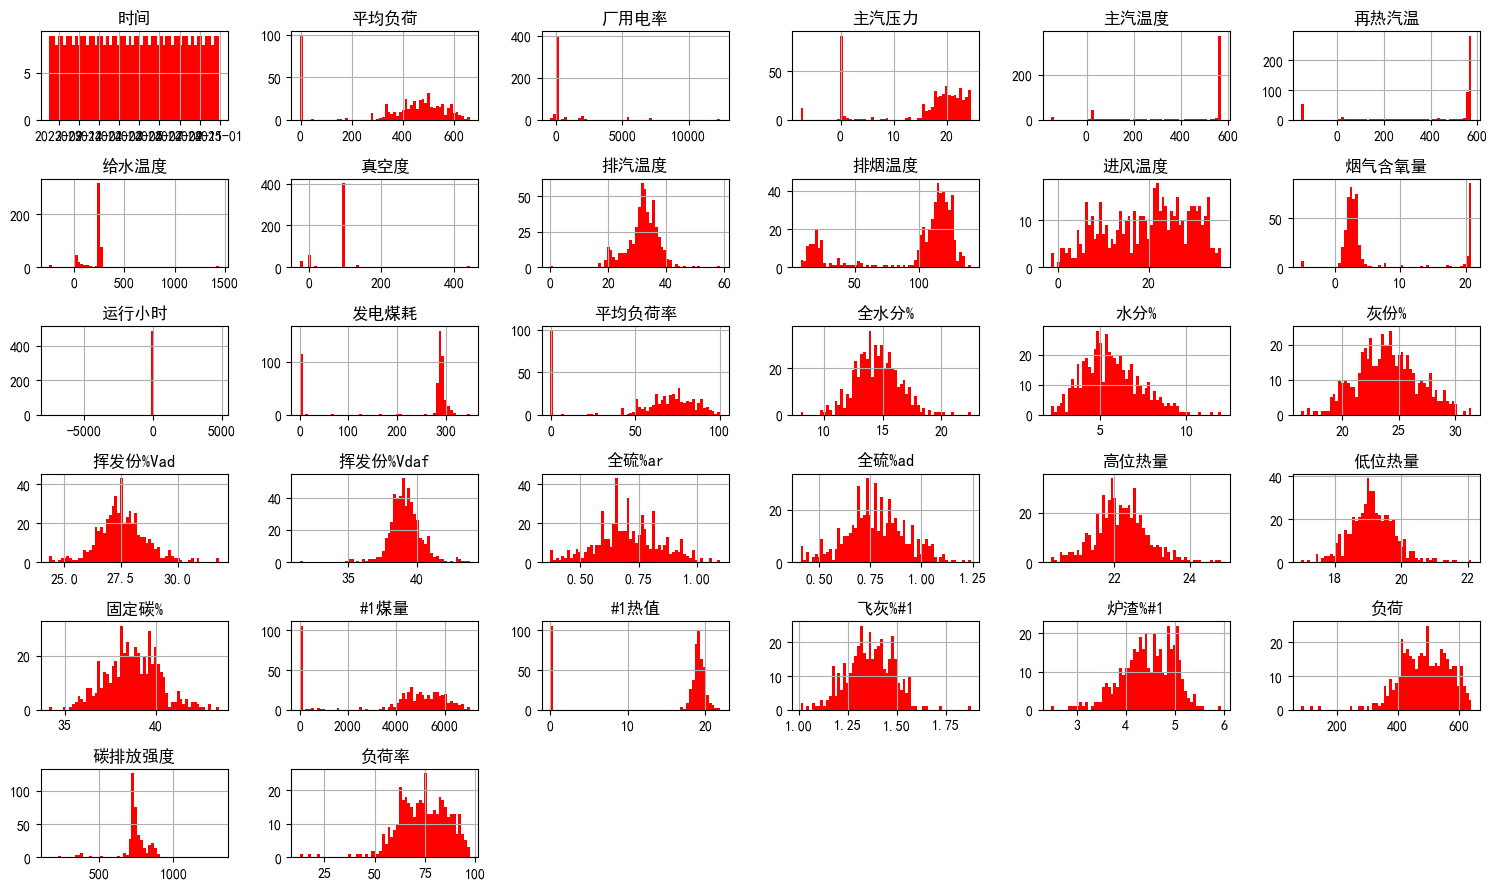

In [4]:
df.hist(bins=60, figsize=(15,9),color="red");plt.tight_layout();plt.show()

## 缺失值处理(待定）

In [5]:
# # 对 DataFrame 中的所有列使用插值法填充缺失值
# df_all = df.interpolate(method='linear', axis=0)

# # 检查填充后的缺失数据
# print(df_all.isnull().sum())


In [6]:
# df_all

## 删除缺失值

In [7]:
df[df["负荷"].isnull()]

,时间,平均负荷,厂用电率,主汽压力,主汽温度,再热汽温,给水温度,真空度,排汽温度,排烟温度,...,高位热量,低位热量,固定碳%,#1煤量,#1热值,飞灰%#1,炉渣%#1,负荷,碳排放强度,负荷率
108,2023-11-17,-3.341169,-3.253302,0.789123,361.840483,352.773619,136.895327,0.076739,37.344292,32.591177,...,23.86,20.38,41.34,0,0.00,NaN,NaN,NaN,NaN,NaN
109,2023-11-18,-3.341169,-3.253302,0.020694,292.387990,291.319373,109.556498,0.020719,40.631955,53.451107,...,22.56,19.26,38.39,0,0.00,NaN,NaN,NaN,NaN,NaN
110,2023-11-19,-3.341169,-3.253302,0.017481,238.286466,242.534709,92.345270,0.064607,37.657933,24.533275,...,22.94,19.66,38.30,0,0.00,NaN,NaN,NaN,NaN,NaN
111,2023-11-20,-3.341169,-3.253302,0.017114,198.759526,203.654185,75.202591,0.009573,35.859215,21.711463,...,22.38,19.14,37.82,0,0.00,NaN,NaN,NaN,NaN,NaN
112,2023-11-21,-3.341169,-3.253302,0.016927,165.208582,168.690718,65.902593,-0.001260,33.028410,20.614001,...,21.60,18.36,37.08,0,0.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,2024-11-26,-0.399994,2333.624998,-0.009375,18.431578,18.703079,39.324002,0.922019,17.516919,12.960072,...,20.96,17.64,35.99,0,0.00,NaN,NaN,NaN,NaN,NaN
484,2024-11-27,-0.499992,2333.624998,-0.009785,17.678917,17.341375,36.496201,0.580004,16.921232,14.273162,...,21.19,18.08,36.42,533,19.02,NaN,NaN,NaN,NaN,NaN
485,2024-11-28,-0.199997,2333.624998,-0.096211,16.804256,64.823914,53.189062,88.677668,43.015676,12.170410,...,21.61,18.15,36.31,569,19.52,NaN,NaN,NaN,NaN,NaN
486,2024-11-29,-0.199997,2333.624998,7.832336,484.186859,437.026977,89.298889,86.741326,50.718763,51.481904,...,21.94,17.75,35.83,894,17.99,NaN,NaN,NaN,NaN,NaN


In [8]:
# 删除缺失值
df_without_NaN = df.dropna()
df_without_NaN

,时间,平均负荷,厂用电率,主汽压力,主汽温度,再热汽温,给水温度,真空度,排汽温度,排烟温度,...,高位热量,低位热量,固定碳%,#1煤量,#1热值,飞灰%#1,炉渣%#1,负荷,碳排放强度,负荷率
29,2023-08-30,503.746541,4.048387,21.963646,565.310823,563.783027,256.605620,93.635451,36.490725,121.215395,...,21.63,18.59,37.71,5116,18.68,1.396667,4.43,507.040972,864.191446,76.824390
30,2023-08-31,504.245692,4.239242,21.299573,565.778736,562.133942,255.719925,93.793320,36.220205,120.378149,...,21.76,18.58,38.87,5573,18.60,1.320000,4.25,500.780667,866.830619,75.875859
31,2023-09-01,450.000000,4.780510,18.289357,565.429870,554.918307,251.164150,94.648271,33.548437,114.759191,...,20.95,18.15,37.42,4614,17.96,1.226667,5.05,375.874807,877.307192,56.950728
32,2023-09-02,479.200030,4.316695,20.275322,566.108077,562.200508,254.588100,94.475085,34.044729,119.325913,...,22.52,19.41,38.61,4478,19.18,1.180000,3.96,433.713368,857.001962,65.714147
33,2023-09-03,484.600020,4.075412,22.956350,566.907562,570.381374,253.634600,93.990242,35.930107,120.766639,...,21.52,18.71,37.42,6032,18.81,1.433333,5.56,541.190174,860.820043,81.998511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,2024-12-27,536.785727,3.514480,23.833649,568.796295,565.480041,265.273621,96.556121,30.391722,114.439377,...,22.48,18.93,36.91,5306,19.24,1.486667,4.91,513.771944,794.480431,77.844234
515,2024-12-28,388.962175,3.514480,18.112924,560.746643,547.274780,246.852801,97.132126,26.792375,102.516357,...,21.95,18.29,35.78,3825,18.69,1.476667,5.02,377.354861,795.348729,57.174979
516,2024-12-29,435.360017,3.514480,18.704281,561.251831,556.695557,252.086365,96.711757,28.329635,97.923981,...,22.19,18.18,35.75,3668,18.41,1.356667,4.98,360.441215,896.680537,54.612305
517,2024-12-30,363.211545,3.514480,16.992607,558.918640,545.457459,243.366595,96.686992,27.013812,101.438002,...,21.59,18.26,35.48,3777,17.91,1.526667,5.29,351.485417,897.858448,53.255366


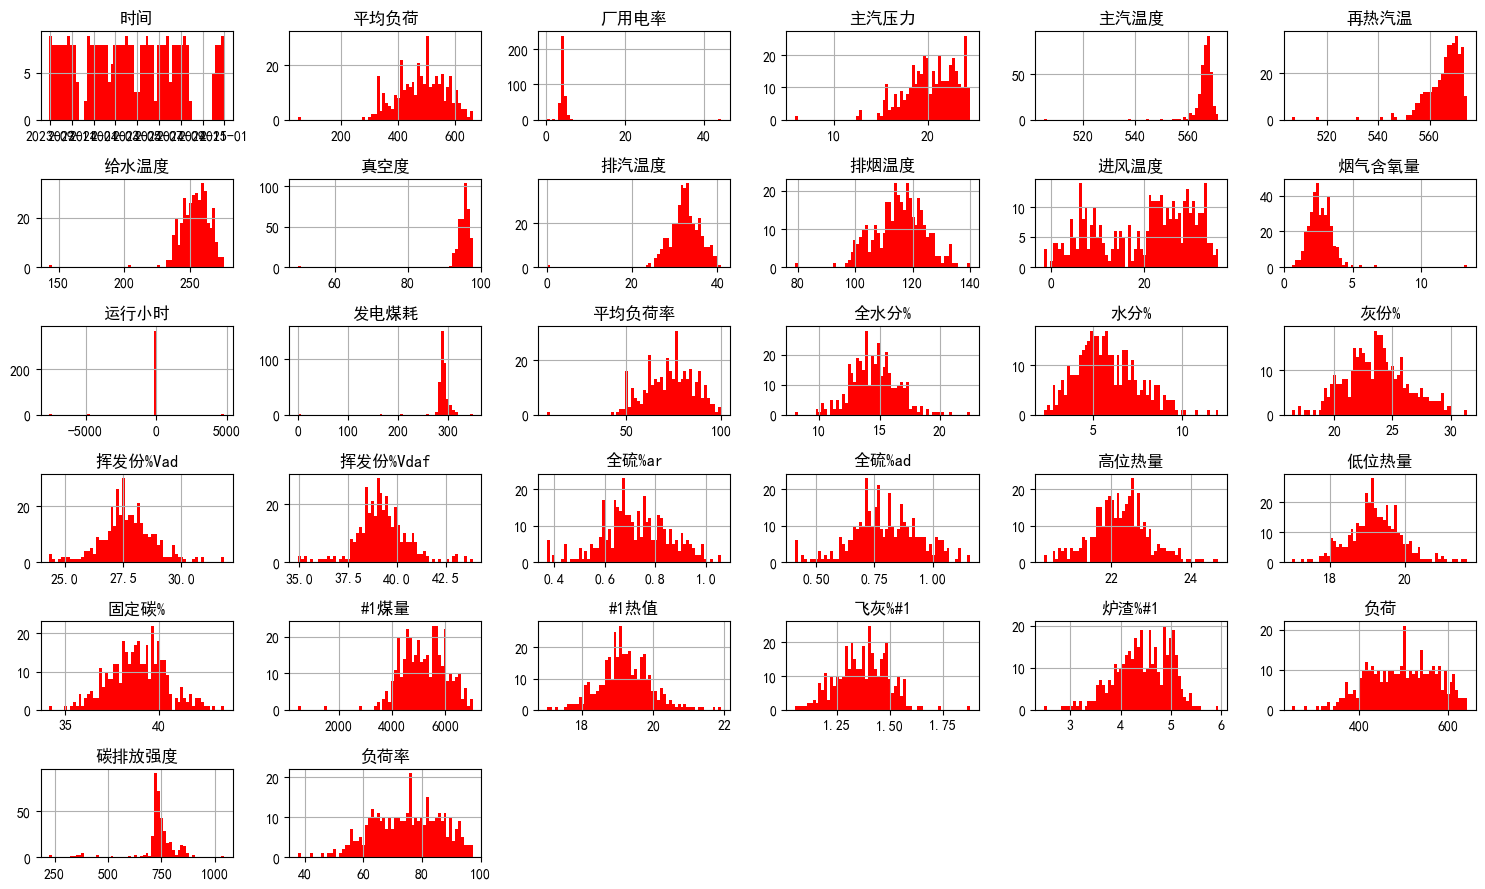

In [9]:
df_without_NaN.hist(bins=60, figsize=(15,9),color="red");plt.tight_layout();plt.show()

# 异常值处理

In [10]:
df_without_NaN

,时间,平均负荷,厂用电率,主汽压力,主汽温度,再热汽温,给水温度,真空度,排汽温度,排烟温度,...,高位热量,低位热量,固定碳%,#1煤量,#1热值,飞灰%#1,炉渣%#1,负荷,碳排放强度,负荷率
29,2023-08-30,503.746541,4.048387,21.963646,565.310823,563.783027,256.605620,93.635451,36.490725,121.215395,...,21.63,18.59,37.71,5116,18.68,1.396667,4.43,507.040972,864.191446,76.824390
30,2023-08-31,504.245692,4.239242,21.299573,565.778736,562.133942,255.719925,93.793320,36.220205,120.378149,...,21.76,18.58,38.87,5573,18.60,1.320000,4.25,500.780667,866.830619,75.875859
31,2023-09-01,450.000000,4.780510,18.289357,565.429870,554.918307,251.164150,94.648271,33.548437,114.759191,...,20.95,18.15,37.42,4614,17.96,1.226667,5.05,375.874807,877.307192,56.950728
32,2023-09-02,479.200030,4.316695,20.275322,566.108077,562.200508,254.588100,94.475085,34.044729,119.325913,...,22.52,19.41,38.61,4478,19.18,1.180000,3.96,433.713368,857.001962,65.714147
33,2023-09-03,484.600020,4.075412,22.956350,566.907562,570.381374,253.634600,93.990242,35.930107,120.766639,...,21.52,18.71,37.42,6032,18.81,1.433333,5.56,541.190174,860.820043,81.998511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,2024-12-27,536.785727,3.514480,23.833649,568.796295,565.480041,265.273621,96.556121,30.391722,114.439377,...,22.48,18.93,36.91,5306,19.24,1.486667,4.91,513.771944,794.480431,77.844234
515,2024-12-28,388.962175,3.514480,18.112924,560.746643,547.274780,246.852801,97.132126,26.792375,102.516357,...,21.95,18.29,35.78,3825,18.69,1.476667,5.02,377.354861,795.348729,57.174979
516,2024-12-29,435.360017,3.514480,18.704281,561.251831,556.695557,252.086365,96.711757,28.329635,97.923981,...,22.19,18.18,35.75,3668,18.41,1.356667,4.98,360.441215,896.680537,54.612305
517,2024-12-30,363.211545,3.514480,16.992607,558.918640,545.457459,243.366595,96.686992,27.013812,101.438002,...,21.59,18.26,35.48,3777,17.91,1.526667,5.29,351.485417,897.858448,53.255366


In [11]:
df_without_NaN.columns

Index(['时间', '平均负荷', '厂用电率', '主汽压力', '主汽温度', '再热汽温', '给水温度', '真空度', '排汽温度',
       '排烟温度', '进风温度', '烟气含氧量', '运行小时', '发电煤耗', '平均负荷率', '全水分%', '水分%', '灰份%',
       '挥发份%Vad', '挥发份%Vdaf', '全硫%ar', '全硫%ad', '高位热量', '低位热量', '固定碳%', '#1煤量',
       '#1热值', '飞灰%#1', '炉渣%#1', '负荷', '碳排放强度', '负荷率'],
      dtype='object')

In [12]:
def remove_outlier(df,columns):
    # 1st quartile (25%)
    Q1 = np.percentile(df[columns], 25)
    # 3rd quartile (75%)
    Q3 = np.percentile(df[columns],75)
    # Interquartile range (IQR)
    IQR = Q3 - Q1
    # outlier step
    outlier_step = 1.5 * IQR
    df_out = df[(df[columns]>=Q1-outlier_step) & (df[columns]<=Q3+outlier_step)]
    return df_out

In [13]:
df_out = remove_outlier(df_without_NaN,'碳排放强度')
df_out

,时间,平均负荷,厂用电率,主汽压力,主汽温度,再热汽温,给水温度,真空度,排汽温度,排烟温度,...,高位热量,低位热量,固定碳%,#1煤量,#1热值,飞灰%#1,炉渣%#1,负荷,碳排放强度,负荷率
48,2023-09-18,593.841831,4.017603,24.003689,567.531101,572.399317,266.982615,93.534311,37.515333,133.751704,...,21.67,19.02,37.41,6581,18.30,1.476667,4.11,597.907639,687.196921,90.592066
49,2023-09-19,572.992798,4.048360,24.032942,567.712109,571.290313,264.921353,93.599625,37.087099,130.134350,...,21.96,19.32,37.24,6757,19.18,1.453333,5.17,603.000833,715.328144,91.363763
50,2023-09-20,534.022288,4.133556,23.458442,567.099483,570.510873,260.407107,93.797942,36.426971,122.554977,...,21.68,18.97,37.82,5838,18.93,1.463333,4.86,537.971424,677.742696,81.510822
51,2023-09-21,495.091329,3.967604,23.029013,568.286742,570.525393,255.807265,94.117702,35.363002,113.376325,...,20.66,18.05,37.21,5369,17.90,1.406667,4.57,499.974792,730.098301,75.753756
52,2023-09-22,562.773237,4.103118,23.792460,566.354130,569.230561,263.427237,93.941885,36.417749,118.215818,...,22.45,19.57,38.51,5990,19.77,1.446667,5.32,568.329583,726.687887,86.110543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,2024-12-25,500.468430,3.756621,21.623268,568.499451,564.862060,259.848901,96.447589,30.257813,103.968450,...,22.30,18.78,37.62,4853,18.62,1.483333,4.71,525.217813,791.762686,79.578456
513,2024-12-26,398.183344,3.756621,18.410751,562.395752,557.794190,247.648672,96.749534,28.052067,100.214782,...,21.22,17.47,34.16,4574,18.08,1.423333,4.85,455.539028,792.304771,69.021065
514,2024-12-27,536.785727,3.514480,23.833649,568.796295,565.480041,265.273621,96.556121,30.391722,114.439377,...,22.48,18.93,36.91,5306,19.24,1.486667,4.91,513.771944,794.480431,77.844234
515,2024-12-28,388.962175,3.514480,18.112924,560.746643,547.274780,246.852801,97.132126,26.792375,102.516357,...,21.95,18.29,35.78,3825,18.69,1.476667,5.02,377.354861,795.348729,57.174979


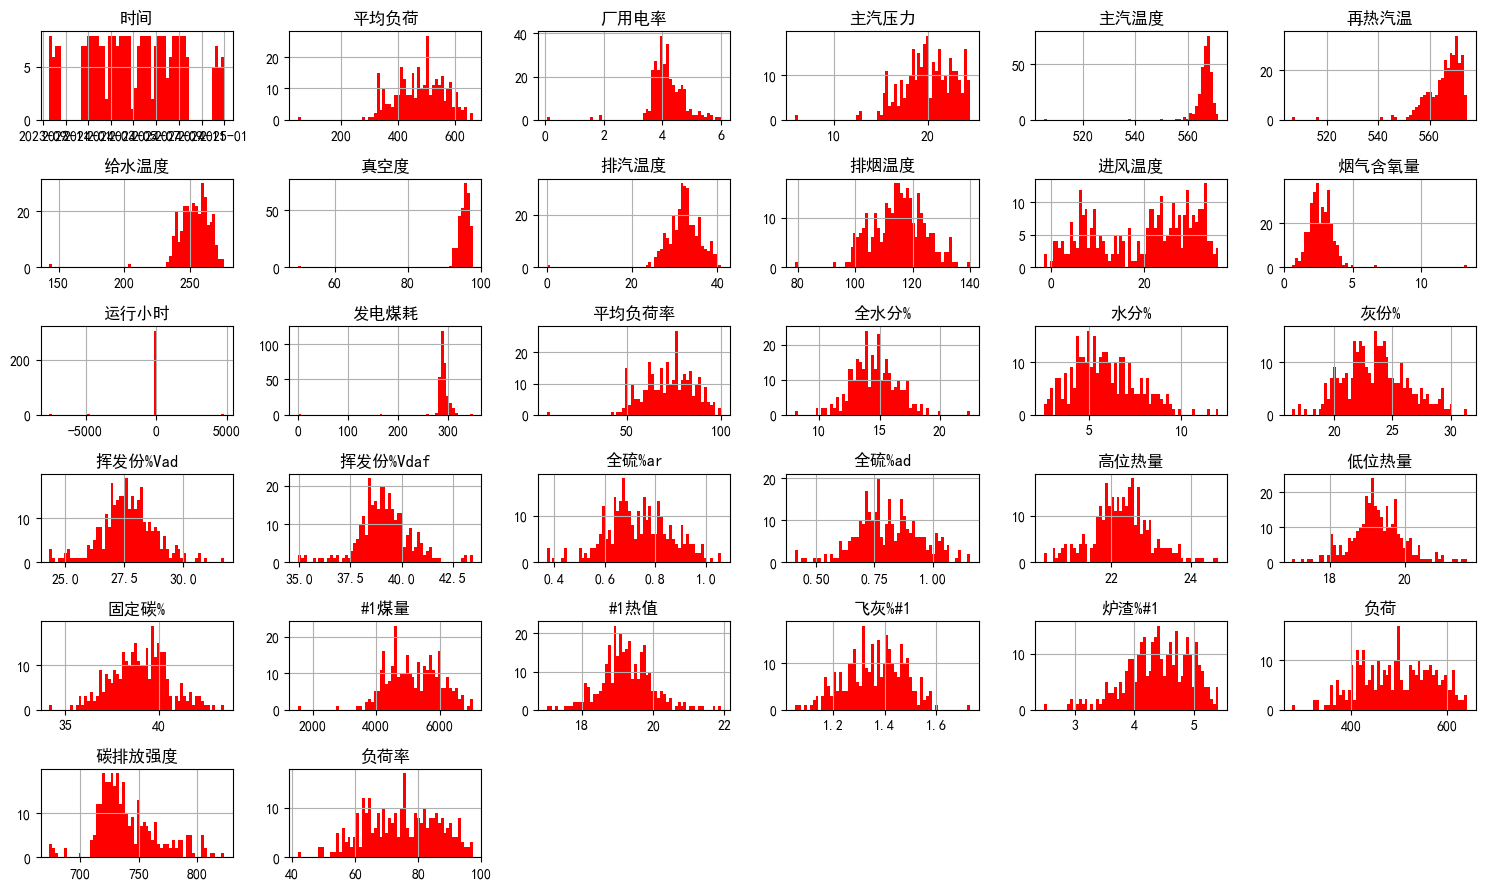

In [14]:
df_out.hist(bins=60, figsize=(15,9),color="red");plt.tight_layout();plt.show()

In [15]:
df_out.to_excel("../已清洗数据（空值异常值处理）/马鞍山1号清洗202308-202412.xlsx")

In [16]:
# '平均负荷', '厂用电率', '主汽压力', '主汽温度', '再热汽温', '给水温度', '真空度', '排汽温度',
#        '排烟温度', '进风温度', '烟气含氧量', '运行小时', '发电煤耗', '平均负荷率', '全水分%', '水分%', '灰份%',
#        '挥发份%Vad', '挥发份%Vdaf', '全硫%ar', '全硫%ad', '高位热量', '低位热量', '固定碳%', '#1煤量',
#        '#1热值', '飞灰%#1', '炉渣%#1', '负荷', '碳排放强度', '负荷率'

IndentationError: unexpected indent (2245665113.py, line 2)

In [17]:
d1 = remove_outlier(df_out,'平均负荷')
d2 = remove_outlier(d1,'厂用电率')
d3 = remove_outlier(d2,'主汽压力')
d4 = remove_outlier(d3,'主汽温度')
d5 = remove_outlier(d4,'再热汽温')
d6 = remove_outlier(d5,'给水温度')
d7 = remove_outlier(d6,'真空度')
d8 = remove_outlier(d7,'排汽温度')
d9 = remove_outlier(d8,'排烟温度')
d10 = remove_outlier(d9,'烟气含氧量')
d10

,时间,平均负荷,厂用电率,主汽压力,主汽温度,再热汽温,给水温度,真空度,排汽温度,排烟温度,...,高位热量,低位热量,固定碳%,#1煤量,#1热值,飞灰%#1,炉渣%#1,负荷,碳排放强度,负荷率
48,2023-09-18,593.841831,4.017603,24.003689,567.531101,572.399317,266.982615,93.534311,37.515333,133.751704,...,21.67,19.02,37.41,6581,18.30,1.476667,4.11,597.907639,687.196921,90.592066
49,2023-09-19,572.992798,4.048360,24.032942,567.712109,571.290313,264.921353,93.599625,37.087099,130.134350,...,21.96,19.32,37.24,6757,19.18,1.453333,5.17,603.000833,715.328144,91.363763
50,2023-09-20,534.022288,4.133556,23.458442,567.099483,570.510873,260.407107,93.797942,36.426971,122.554977,...,21.68,18.97,37.82,5838,18.93,1.463333,4.86,537.971424,677.742696,81.510822
51,2023-09-21,495.091329,3.967604,23.029013,568.286742,570.525393,255.807265,94.117702,35.363002,113.376325,...,20.66,18.05,37.21,5369,17.90,1.406667,4.57,499.974792,730.098301,75.753756
52,2023-09-22,562.773237,4.103118,23.792460,566.354130,569.230561,263.427237,93.941885,36.417749,118.215818,...,22.45,19.57,38.51,5990,19.77,1.446667,5.32,568.329583,726.687887,86.110543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,2024-12-24,604.244463,3.675983,24.218706,567.443054,561.465454,271.482727,95.942665,32.655683,112.900076,...,22.41,19.02,37.83,5760,18.73,1.263333,4.96,520.800557,806.933845,78.909175
512,2024-12-25,500.468430,3.756621,21.623268,568.499451,564.862060,259.848901,96.447589,30.257813,103.968450,...,22.30,18.78,37.62,4853,18.62,1.483333,4.71,525.217813,791.762686,79.578456
513,2024-12-26,398.183344,3.756621,18.410751,562.395752,557.794190,247.648672,96.749534,28.052067,100.214782,...,21.22,17.47,34.16,4574,18.08,1.423333,4.85,455.539028,792.304771,69.021065
514,2024-12-27,536.785727,3.514480,23.833649,568.796295,565.480041,265.273621,96.556121,30.391722,114.439377,...,22.48,18.93,36.91,5306,19.24,1.486667,4.91,513.771944,794.480431,77.844234


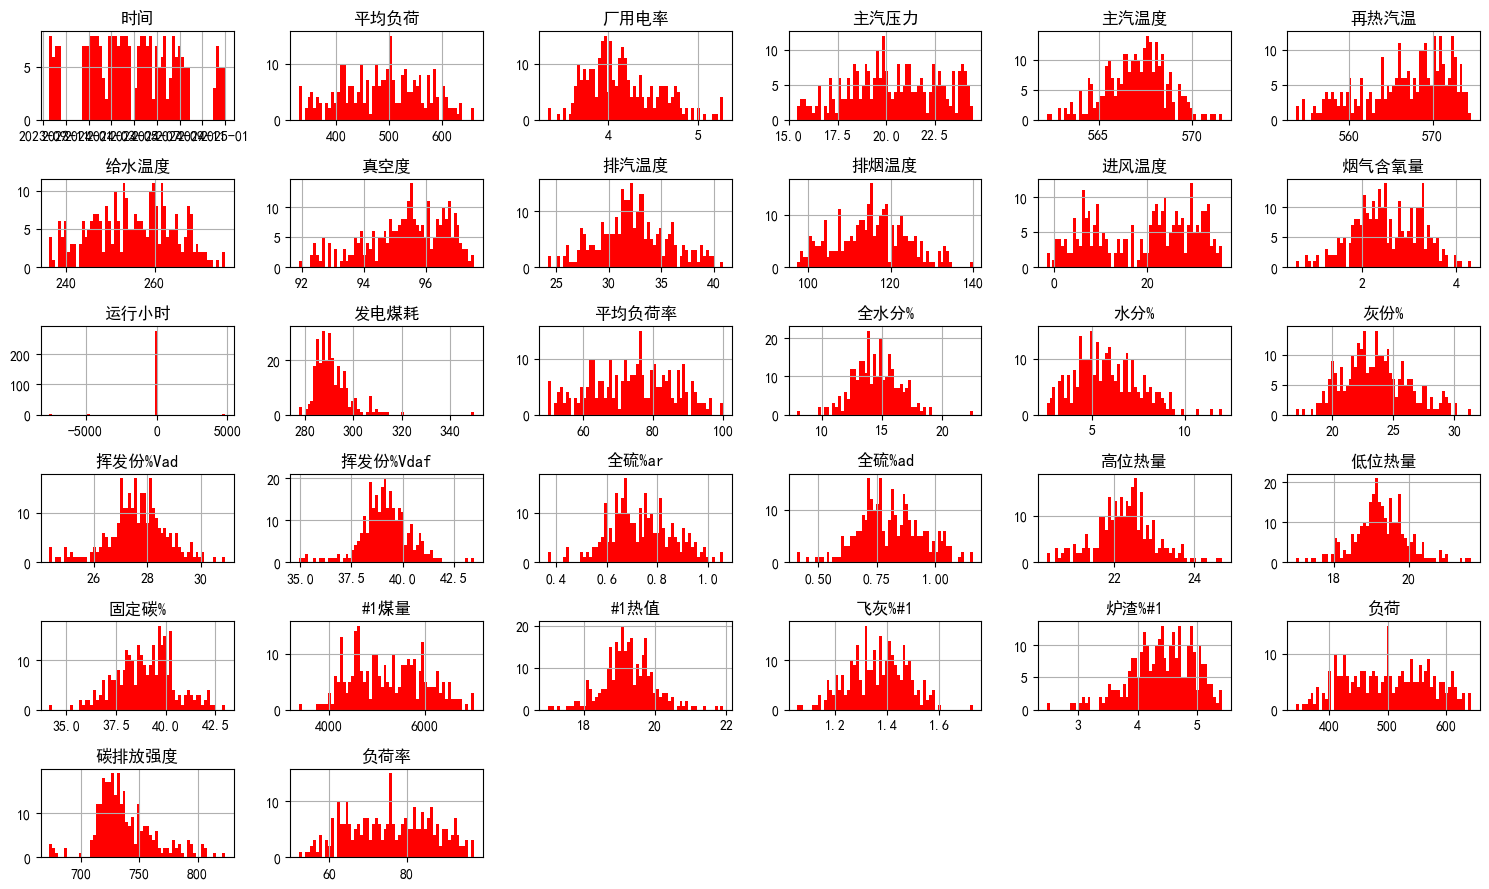

In [18]:
d10.hist(bins=60, figsize=(15,9),color="red");plt.tight_layout();plt.show()

In [19]:
d10.to_excel("../已清洗数据（空值异常值处理）/马鞍山1号清洗.xlsx")

In [ ]:
df_out[(df_out['运行小时']>-1)|(df_out['运行小时']<25)]

In [ ]:
# Q1_ZaiReQiWen = np.percentile(cleaned_df["再热汽温"], 25)
# Q3_ZaiReQiWen = np.percentile(cleaned_df["再热汽温"],75)
# IQR_ZaiReQiWen = Q3_ZaiReQiWen - Q1_ZaiReQiWen
# outlier_step_ZaiReQiWen = 1.5 * IQR_ZaiReQiWen

# Q1_YangLiang = np.percentile(cleaned_df["烟气含氧量"], 25)
# Q3_YangLiang = np.percentile(cleaned_df["烟气含氧量"],75)
# IQR_YangLiang = Q3_YangLiang - Q1_YangLiang
# outlier_step_YangLiang = 1.5 * IQR_YangLiang

# Q1_PaiYanWenDu = np.percentile(cleaned_df["排烟温度"], 25)
# Q3_PaiYanWenDu = np.percentile(cleaned_df["排烟温度"],75)
# IQR_PaiYanWenDu = Q3_PaiYanWenDu - Q1_PaiYanWenDu
# outlier_step_PaiYanWenDu = 1.5 * IQR_PaiYanWenDu

# Q1_TanPaiFangQiangDu = np.percentile(cleaned_df["碳排放强度"], 25)
# Q3_TanPaiFangQiangDu = np.percentile(cleaned_df["碳排放强度"],75)
# IQR_TanPaiFangQiangDu = Q3_TanPaiFangQiangDu - Q1_TanPaiFangQiangDu
# outlier_step_TanPaiFangQiangDu = 1.5 * IQR_TanPaiFangQiangDu

# df_out_1 = cleaned_df[(cleaned_df["再热汽温"]>=Q1_ZaiReQiWen-outlier_step_ZaiReQiWen) & (cleaned_df["再热汽温"]<=Q3_ZaiReQiWen+outlier_step_ZaiReQiWen) &
#                 (cleaned_df["烟气含氧量"]>=Q1_YangLiang-outlier_step_YangLiang) & (cleaned_df["烟气含氧量"]<=Q3_YangLiang+outlier_step_YangLiang) &
#                 (cleaned_df["排烟温度"]>=Q1_PaiYanWenDu-outlier_step_PaiYanWenDu) & (cleaned_df["排烟温度"]<=Q3_PaiYanWenDu+outlier_step_PaiYanWenDu) & 
#                 (cleaned_df["碳排放强度"]>=Q1_TanPaiFangQiangDu-outlier_step_TanPaiFangQiangDu) & (cleaned_df["碳排放强度"]<=Q3_TanPaiFangQiangDu+outlier_step_TanPaiFangQiangDu) &
#                 (cleaned_df["平均负荷"]>200) & (cleaned_df["厂用电率"]<100) & (cleaned_df["主汽压力"]>10) & (cleaned_df["主汽温度"]>400) &
#                 (cleaned_df["排汽温度"]<500) & (cleaned_df["碳排放强度"]>200) & (cleaned_df['运行小时']>-1) & (cleaned_df['运行小时']<25) &(cleaned_df['进风温度']>0)  ]

# df_out_1.hist(bins=60, figsize=(15,9),color="red")
# plt.tight_layout()
# plt.show()

In [ ]:
# df_out_1